In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import norm

In [31]:
common_dir=r"D:\Hemanth Engineering\Assignments\6th Sem\Mini Proj"

<h4>Loading the Saved Variables<h4>

In [32]:
X_train_scaled=np.load(fr"{common_dir}\Research\Data\With Modifications\X_train_scaled.npy")
X_test_scaled=np.load(fr"{common_dir}\Research\Data\With Modifications\X_test_scaled.npy")
X_train=np.load(fr"{common_dir}\Research\Data\With Modifications\x_train.npy")
X_test=np.load(fr"{common_dir}\Research\Data\With Modifications\x_test.npy")
y_test=np.load(fr"{common_dir}\Research\Data\With Modifications\y_test.npy")
y_train=np.load(fr"{common_dir}\Research\Data\With Modifications\y_train.npy")

<h2>Random Forest Regressor<h2>

In [33]:
# creating model: # defined hyperparameters are 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, and 'n_estimators': 100.
randFor = RandomForestRegressor(n_estimators=100,max_depth=15,max_features='auto',min_samples_leaf=1,min_samples_split=2)
# Fitting the model
randFor.fit(X_train,y_train)

RandomForestRegressor(max_depth=15)

In [34]:
#score Calculation
randFor.score(X_train,y_train) * 100

98.48766238510173

<h3> AQI predictions Using Random Forest Regressor<h3>

In [44]:
# Predict on test set
y_pred = randFor.predict(X_test)

In [45]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.023941522095630004


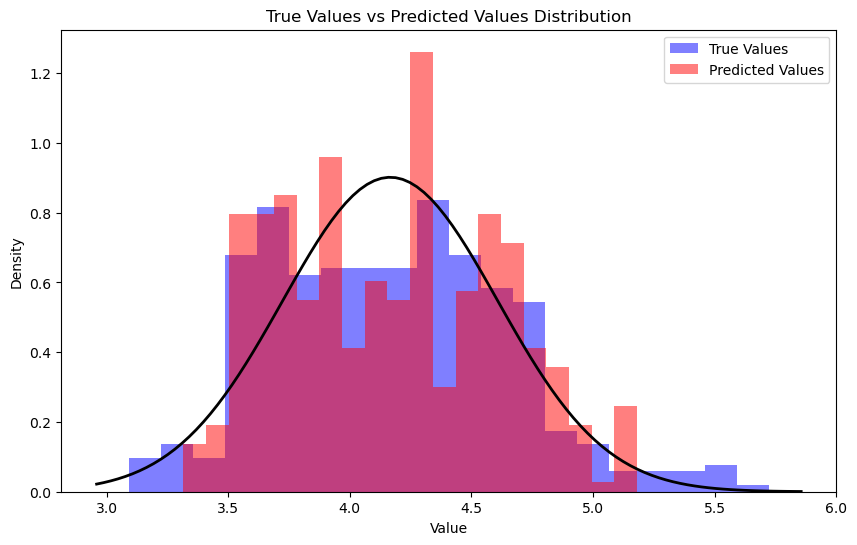

In [46]:
# Plotting the normal distribution of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, density=True, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred, bins=20, density=True, alpha=0.5, color='red', label='Predicted Values')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(y_pred), np.std(y_pred))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('True Values vs Predicted Values Distribution')
plt.legend()
plt.show()

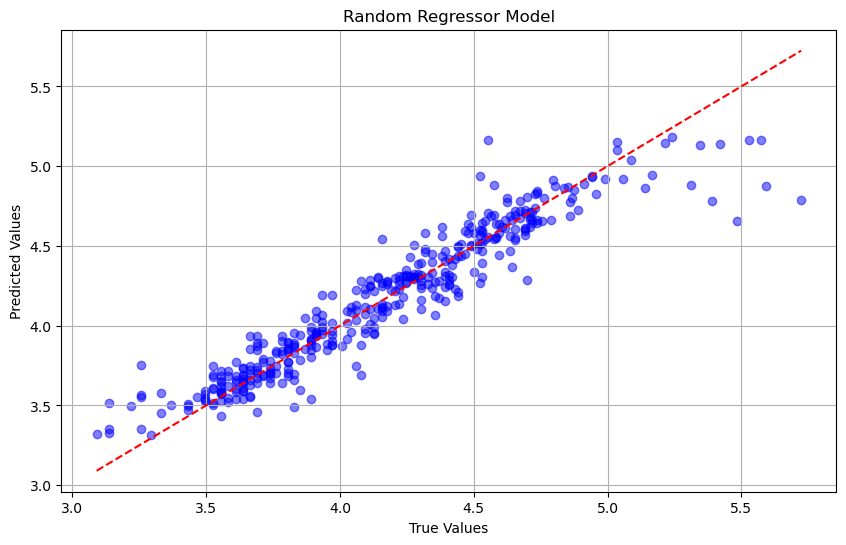

In [47]:
# Scatter plot of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Regressor Model')
plt.grid(True)
plt.show()

<h4>Sample Prediction for one day<h4>

In [48]:
input_array = np.array([4.008060212, 4.51041986, 3.306886739, 4.683334216, 4.377893116, 2.226783487, -0.06187434, 3.070839792, 0.336472951, 1.33500133, 2.827905222, 4.165579379, -0.994249571, 2.947591951, -2.207265822, 0.398776791, 5.504843616, 3.477540979, 4.757805441])

# Reshape the input array
input_array_reshaped = input_array.reshape(1, -1)
prediction = randFor.predict(input_array_reshaped)

In [49]:
denormalized_predictions = np.exp(prediction[0])
denormalized_predictions

122.19187943160205